In [22]:
import signac
import numpy as np
import matplotlib.pyplot as plt
import cmeutils

import scienceplots
import gsd.hoomd
#plt.style.use('science')

In [2]:
project = signac.get_project("../pps-flow/")

# Pressure vs Density:

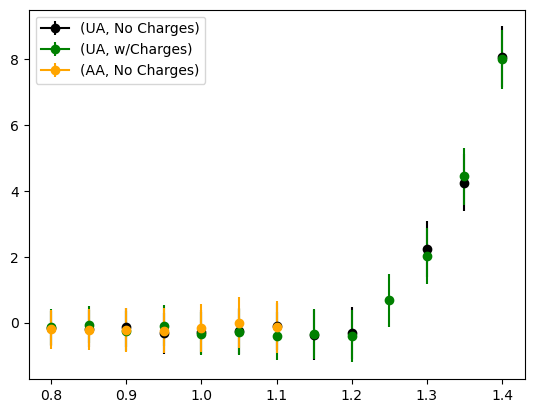

In [19]:
fig = plt.figure()
for den, job in project.find_jobs(
    {"remove_charges": True, "remove_hydrogens": True}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    #plt.plot(den, job.doc.average_pressure, "o", c="k", label="(UA, No Charges)")
    plt.errorbar(
        x=den, y=job.doc.average_pressure, yerr=job.doc.pressure_std, marker="o", c="k", label="(UA, No Charges)"
    )
    
for den, job in project.find_jobs(
    {"remove_charges": False, "remove_hydrogens": True}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    #plt.plot(den, job.doc.average_pressure, "o", c="g", label="(UA, w/Charges)")
    plt.errorbar(
        x=den, y=job.doc.average_pressure, yerr=job.doc.pressure_std, marker="o", c="g", label="(UA, w/Charges)"
    )
    
for den, job in project.find_jobs(
    {"remove_charges": False, "remove_hydrogens": False}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    #plt.plot(den, job.doc.average_pressure, "o", c="blue", label="(AA, w/Charges)")
    plt.errorbar(
        x=den, y=job.doc.average_pressure, yerr=job.doc.pressure_std, marker="o", c="blue", label="(AA, w/Charges)"
    )

for den, job in project.find_jobs(
    {"remove_charges": True, "remove_hydrogens": False}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    #plt.plot(den, job.doc.average_pressure, "o", c="orange", label="(AA, No Charges)")
    plt.errorbar(
        x=den, y=job.doc.average_pressure, yerr=job.doc.pressure_std, marker="o", c="orange", label="(AA, No Charges)"
    )
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Potential Energies:

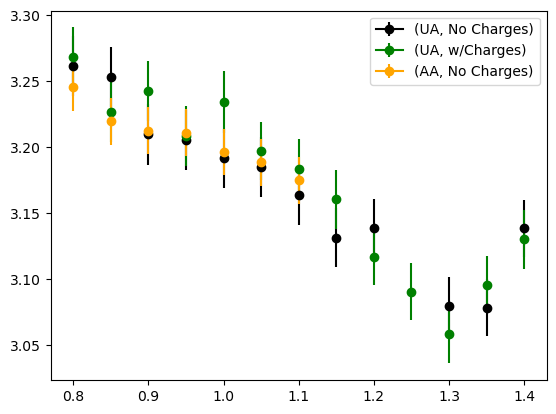

In [30]:
fig = plt.figure()
y = "average_pe"
err = "pe_std"
for den, job in project.find_jobs(
    {"remove_charges": True, "remove_hydrogens": True}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    plt.errorbar(
        x=den, y=job.doc[y]/job.doc.N, yerr=job.doc[err]/job.doc.N, marker="o", c="k", label="(UA, No Charges)"
    )
    
for den, job in project.find_jobs(
    {"remove_charges": False, "remove_hydrogens": True}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    plt.errorbar(
        x=den, y=job.doc[y]/job.doc.N, yerr=job.doc[err]/job.doc.N, marker="o", c="g", label="(UA, w/Charges)"
    )
    
for den, job in project.find_jobs(
    {"remove_charges": False, "remove_hydrogens": False}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    plt.errorbar(
        x=den, y=job.doc[y]/job.doc.N, yerr=job.doc[err]/job.doc.N, marker="o", c="blue", label="(AA, w/Charges)"
    )

for den, job in project.find_jobs(
    {"remove_charges": True, "remove_hydrogens": False}, doc_filter={"done": True}).groupby("density"):
    job = list(job)[0]
    plt.errorbar(
        x=den, y=job.doc[y]/job.doc.N, yerr=job.doc[err]/job.doc.N, marker="o", c="orange", label="(AA, No Charges)"
    )
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [29]:
for job in project.find_jobs(doc_filter={"done": True}):
    with gsd.hoomd.open(job.fn("trajectory.gsd")) as traj:
        job.doc.N = traj[0].particles.N

/home/chrisjones4/miniconda3/envs/pps/lib/python3.9/site-packages/signac/synced_collections/numpy_utils.py:46: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)


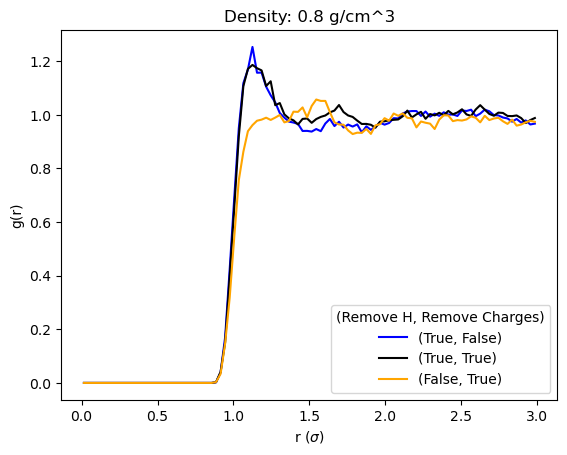

In [61]:
color_dict = {
    (True, True): "k",
    (True, False): "b",
    (False, False): "g",
    (False, True): "orange",
}
densities = [0.8, 0.85, 0.95, 1.0, 0.9, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4]

for den in densities:
    fig = plt.figure()
    for job in project.find_jobs({"density": den}, {"done": True}):
        rdf, N = cmeutils.structure.gsd_rdf(
            gsdfile=job.fn("trajectory.gsd"),
            A_name="s",
            B_name="s",
            start=-50,
            stop=-1,
            exclude_bonded=True,
            r_max=3.0
        )
        label = (job.sp.remove_hydrogens, job.sp.remove_charges)
        c = color_dict[label]
        plt.plot(rdf.bin_centers, rdf.rdf*N, label=label, c=color_dict[label])
        
    plt.legend(title=("(Remove H, Remove Charges)"))
    plt.title(f"Density: {den} g/cm^3")
    plt.xlabel("r ($\sigma$)")
    plt.ylabel("g(r)")
    plt.show()

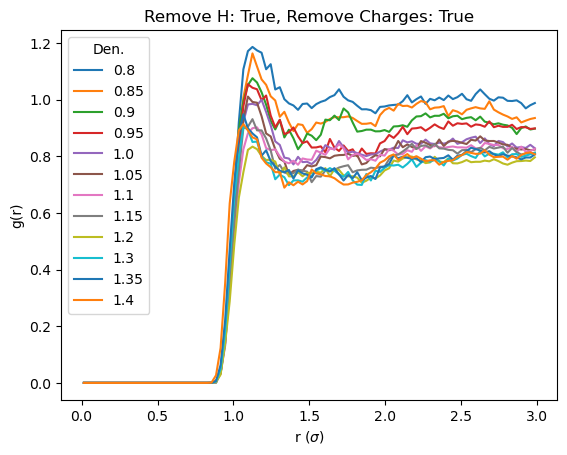

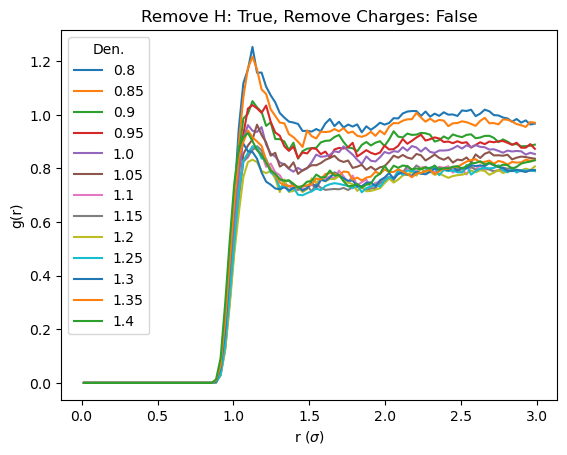

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


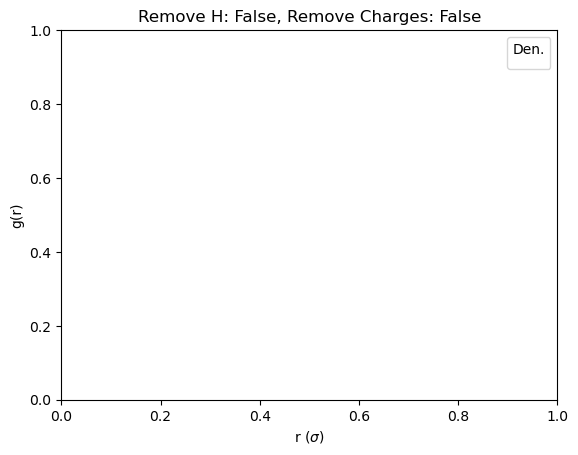

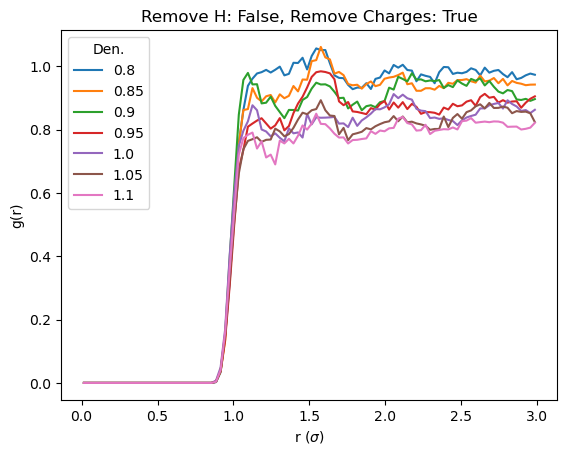

In [68]:
for combo in [(True, True), (True, False), (False, False), (False, True)]:
    fig = plt.figure()
    for den, job in project.find_jobs(
        {"remove_hydrogens": combo[0], "remove_charges": combo[1]}, {"done": True}).groupby("density"):
        job = list(job)[0]
        rdf, N = cmeutils.structure.gsd_rdf(
            gsdfile=job.fn("trajectory.gsd"),
            A_name="s",
            B_name="s",
            start=-50,
            stop=-1,
            exclude_bonded=True,
            r_max=3.0
        )
        plt.plot(rdf.bin_centers, rdf.rdf*N, label=den)
        
    plt.title((f"Remove H: {combo[0]}, Remove Charges: {combo[1]}"))
    plt.legend(title="Den.")
    plt.xlabel("r ($\sigma$)")
    plt.ylabel("g(r)")
    plt.show()